# User Engagement 

Name, email and object id have nothing to do with product adoption, so we will drop them right away.

Let's now start analyzing the factors like : creation_source, creation_time, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id and user_id to see which of these factors could possibly affect user adoption.

Begin by merging the two dataframes such that only users with atleast one 7 day period with minimum 3 logins are included in this dataframe. We will call this dataframe as df

In [1]:
#1.Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

In [2]:
#2.read the user_engagement.csv file
user_engagement = pd.read_csv("takehome_user_engagement.csv")
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [3]:
#3.read the users.csv file
users = pd.read_csv("takehome_users.csv",encoding = "ISO-8859-1")
users.rename(columns = {'object_id':'user_id'}, inplace = True)
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
df1 = user_engagement

In [5]:
df1['year'] = pd.DatetimeIndex(df1['time_stamp']).year
df1['month'] = pd.DatetimeIndex(df1['time_stamp']).month
df1['day'] = pd.DatetimeIndex(df1['time_stamp']).day

In [6]:
df1

,time_stamp,user_id,visited,year,month,day
0,2014-04-22 03:53:30,1,1,2014,4,22
1,2013-11-15 03:45:04,2,1,2013,11,15
2,2013-11-29 03:45:04,2,1,2013,11,29
3,2013-12-09 03:45:04,2,1,2013,12,9
4,2013-12-25 03:45:04,2,1,2013,12,25
...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013,9,6
207913,2013-01-15 18:28:37,11997,1,2013,1,15
207914,2014-04-27 12:45:16,11998,1,2014,4,27
207915,2012-06-02 11:55:59,11999,1,2012,6,2


In [7]:
min3_login = df1[(df1['user_id'].shift(-1) == df1['user_id'].shift(1)) & (df1['year'].shift(-1) == df1['year'].shift(1)) & (df1['month'].shift(-1) == df1['month'].shift(1)) &(df1['day'].shift(-1) - df1['day'].shift(1) <=6)]

In [8]:
user_ids = list(min3_login['user_id'].unique())

In [9]:
adopted_user = df1[df1['user_id'].isin(user_ids)]

In [10]:
adopted_user = adopted_user.drop(['day','month','year'],axis=1)

In [11]:
df = pd.merge(users, adopted_user, on="user_id")
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-31 03:45:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
197626,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-23 11:04:47,1
197627,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-24 11:04:47,1
197628,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-26 11:04:47,1
197629,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014-05-27 11:04:47,1


## 1.How the creation_source affects user adoption
From the below pie chart it is clear that more than half of the visits are by the users whose creation_source are either ORG_INVITE or GUEST_INVITE 

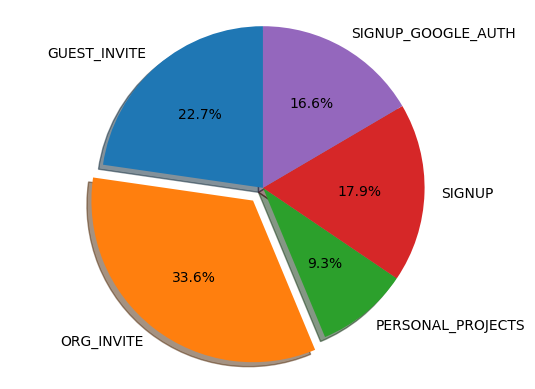

In [13]:
#plot the total visits by creation_source for all years

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'GUEST_INVITE' , 'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'
visits_by_creation_source = list(df.groupby(by=["creation_source"])["visited"].sum())
explode = (0, 0.1, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(visits_by_creation_source, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The below pie chart is the same as above except that it contains user data from year 2014 (users active in 2014 only)

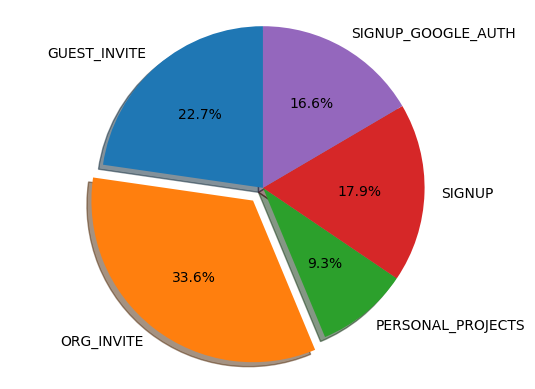

In [23]:
#plot the total visit count by creation_source for the most reccent year (2014)

df_2014 = df
df_2014['year'] = pd.DatetimeIndex(df_2014['time_stamp']).year

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'GUEST_INVITE' , 'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'
visits_by_creation_source = list(df_2014.groupby(by=["creation_source"])["visited"].sum())
explode = (0, 0.1, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(visits_by_creation_source, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

df_2014.drop("year",axis=1)
plt.show()

## 2.How the time of creation affects user adoption
The below pie chart indicates that most of the visits are by the users who created their account in 2012 followed by 2013 (early adopters), whereas the newly registered users are less active.

The exact time of creation usually doesn't have any relation with the user adoption. However, in some cases it may be an important metric. For example, users that sign up during a special offer may go on to become loyal customers, which can lead to higher user retention.

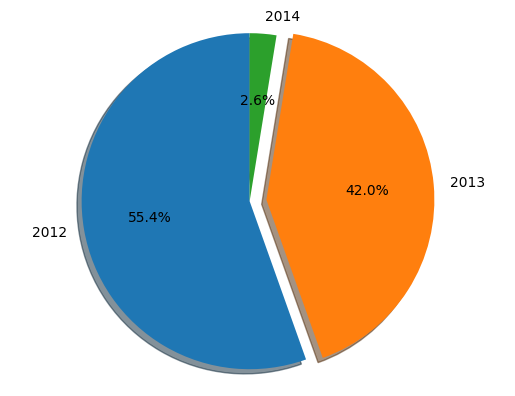

In [14]:
#plot the total visit count by year in which the user got registered  

df["year"] = pd.DatetimeIndex(df['creation_time']).year

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '2012', '2013' , '2014'
visits_by_creation_source = list(df.groupby(by=["year"])["visited"].sum())
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(visits_by_creation_source, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
df.drop("year",axis=1)

plt.show()

## 3.How opting for mailing list or enabled for marketing drip affects the user adoption

The below data shows that the user adoption has less to do with whether or not the user has opted for mailing list or has marketing drip enabled

In [15]:
# total percentage of adopted users not enaled for marketing drip (it is high compared to the 
# adopted users who have marketing drip enabled)
(df[df['enabled_for_marketing_drip']==0]["user_id"].nunique()/len(df["user_id"].unique()))*100

84.53674121405751

In [16]:
# total percentage of adopted users enabled for marketing drip
(df[df['enabled_for_marketing_drip']==1]["user_id"].nunique()/len(df["user_id"].unique()))*100

15.463258785942491

In [17]:
# total percentage of adopted users not opted for mailing list (it is high compared to the 
# adopted users who have opted for the mailing list)
(df[df['opted_in_to_mailing_list']==0]["user_id"].nunique()/len(df["user_id"].unique()))*100

73.9297124600639

In [18]:
# total percentage of adopted users who opted for mailing list
(df[df['opted_in_to_mailing_list']==1]["user_id"].nunique()/len(df["user_id"].unique()))*100

26.070287539936103

## 4.How the last login time affects user adoption

In order to find that, get the most active and the least active users from the adopted users dataframe df, to identify their login activity.
Take top 100 samples from each.

Refer below #4.1 and #4.2 to see the last_login timestamp of least active and most active users.
It can be infered that all of the most active users have logged in at least once in the year 2014.
However, for as much as half of the least active users, the last login time is 2013 and 2012

Thus more active users are more likely to continue using the product in the future as well

In [19]:
most_active = list(df.groupby(by="user_id")["visited"].sum().sort_values(ascending=False).head(100).index.get_level_values(0))

In [20]:
least_active = list(df.groupby(by="user_id")["visited"].sum().sort_values(ascending=True).head(100).index.get_level_values(0))

In [21]:
mactive = df[df['user_id'].isin(most_active)]
last_login_mactive = list(mactive.groupby(by="user_id")["time_stamp"].max())

In [22]:
lactive = df[df['user_id'].isin(least_active)]
last_login_lactive = list(lactive.groupby(by="user_id")["time_stamp"].max())

In [23]:
#4.1
last_login_lactive

['2014-05-29 11:46:38',
 '2013-04-15 07:13:17',
 '2013-01-17 10:14:11',
 '2014-05-24 20:06:19',
 '2014-06-04 22:08:05',
 '2014-04-07 21:23:33',
 '2014-02-05 14:19:03',
 '2013-07-07 18:11:40',
 '2013-06-02 12:50:58',
 '2014-05-26 07:43:44',
 '2014-05-05 00:54:37',
 '2014-01-24 20:36:50',
 '2014-05-08 06:55:06',
 '2013-06-30 04:50:30',
 '2014-01-15 22:13:48',
 '2014-05-15 15:52:48',
 '2014-05-10 06:22:49',
 '2013-02-06 00:39:21',
 '2013-04-21 22:19:02',
 '2014-05-13 16:02:42',
 '2013-02-08 02:35:52',
 '2013-09-27 18:29:45',
 '2014-04-28 03:18:00',
 '2013-04-14 01:14:54',
 '2013-12-06 14:39:24',
 '2013-09-08 03:03:24',
 '2013-11-15 14:07:44',
 '2013-12-31 07:33:08',
 '2014-05-15 01:22:32',
 '2012-11-23 01:38:04',
 '2014-02-20 08:50:57',
 '2014-04-09 15:04:52',
 '2012-09-20 05:17:33',
 '2014-06-01 12:28:52',
 '2014-05-27 12:29:36',
 '2012-10-15 18:34:16',
 '2014-04-25 21:33:44',
 '2013-02-25 09:15:48',
 '2013-11-24 07:19:38',
 '2014-05-24 13:23:25',
 '2013-11-16 02:57:20',
 '2013-10-05 12:

In [24]:
#4.2
last_login_mactive

['2014-05-30 10:15:18',
 '2014-05-26 03:26:27',
 '2014-06-04 06:03:10',
 '2014-05-28 23:10:10',
 '2014-06-04 16:04:36',
 '2014-05-21 18:15:17',
 '2014-06-04 22:49:52',
 '2014-06-04 05:43:47',
 '2014-05-24 16:09:31',
 '2014-06-04 11:59:51',
 '2014-06-04 06:19:34',
 '2014-06-01 17:01:55',
 '2014-06-04 16:02:39',
 '2014-06-04 23:14:30',
 '2014-06-03 19:46:30',
 '2014-05-29 16:44:54',
 '2014-06-04 21:27:10',
 '2014-05-21 00:59:56',
 '2014-06-04 22:34:54',
 '2014-06-03 20:33:26',
 '2014-05-25 17:23:19',
 '2014-06-04 09:11:02',
 '2014-05-27 04:55:39',
 '2014-06-04 01:03:55',
 '2014-05-27 14:34:33',
 '2014-06-04 08:28:50',
 '2014-06-04 18:11:31',
 '2014-06-04 17:12:54',
 '2014-06-04 10:51:56',
 '2014-06-04 22:07:10',
 '2014-06-04 18:33:42',
 '2014-05-28 19:49:02',
 '2014-05-23 05:58:59',
 '2014-05-24 17:41:51',
 '2014-06-04 10:28:24',
 '2014-06-04 23:09:05',
 '2014-05-22 18:36:58',
 '2014-06-03 23:34:35',
 '2014-06-04 08:56:58',
 '2014-06-04 17:32:09',
 '2014-06-01 08:02:02',
 '2014-05-26 17:

## 5.Does org_id affect future user adoption ?

Ideally, it should, but here it doesn't seem to as the total visits for users with same org_id is inconsistent

In [25]:
df.groupby("org_id")["user_id"].value_counts().head(5000)

org_id  user_id
0       10320      420
        7029       165
        11964      160
        10834      123
        4625       111
        7114        67
        4007        27
        11465       16
        2750        14
        10885       12
        8278        10
1       5151       463
        3093       326
        3812       314
        5259       234
        1368       210
        2571       173
        9947       124
        8435       114
        363         49
        5853        35
        4778        18
        2           14
        1151        14
2       10953      499
        10763      237
        1129       163
        4943       144
        7205       133
        3525       123
        341        108
        10022       99
        522         89
        1476        75
        9942        66
        11591       33
        11961       33
        4715        13
        3638         3
3       4269       326
        4619       313
        9303       300
        7818      

## Does invited_by_user_id affect user adoption ?

invited_by_user_id should follow the same pattern as org_id